In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
%matplotlib inline

In [2]:
covid_data = pd.read_csv('Data/CleanedCovidData10-12.csv')

### Inspecting Risk Factors
---

My initial thoughts are that certain risk factors such as "Obesity", "Smoker", "Pneumonia", etc. may play a role in whether or not a COVID patient dies. I will look at the death rate by risk factor.

In [3]:
def getDeathRates3(data,p_variable,t_variable,ax,mapping):
    """This function takes in a dataframe, the name of the predictor variable to group on, and the target variable
    to create the rates on. It returns a list of [0 value rate, 1 value rate]. Also the axis is passed through
    in case of wanting to handle subplots. Lastly, a mapping dictionary variable is passed through which gives the definitions of
    each numerical value in the p_variable"""
    total_death_count = sum(data[t_variable])
    
    unique_p_values = np.unique(data[p_variable])
    
    names = []
    rates = []
    
    for value in unique_p_values:
        value_subset = data[data[p_variable]==value]
        rate = sum(value_subset[t_variable])/len(value_subset[t_variable])
        rates.append(rate)
        names.append(mapping[str(int(value))])
    
    ax.bar(unique_p_values, rates, align='center', alpha=0.5)
    #plt.xticks(y_pos, objects)
    ax.set_xlabel(p_variable)
    ax.set_xticks(unique_p_values)
    ax.set_xticklabels(names)
    ax.set_ylabel('Death Rate')
    ax.set_title('Death Rate by '+p_variable)
    
    return ax

In [4]:
#these files are required in order to do value mapping for the visualizations
with open('Data/data_mapping_clean_data.json') as json_file:
    mappings = json.load(json_file)
with open('Data/data_mapping_raw_data.json') as json_file:
    raw_mappings = json.load(json_file)

### Figure 1 in Report

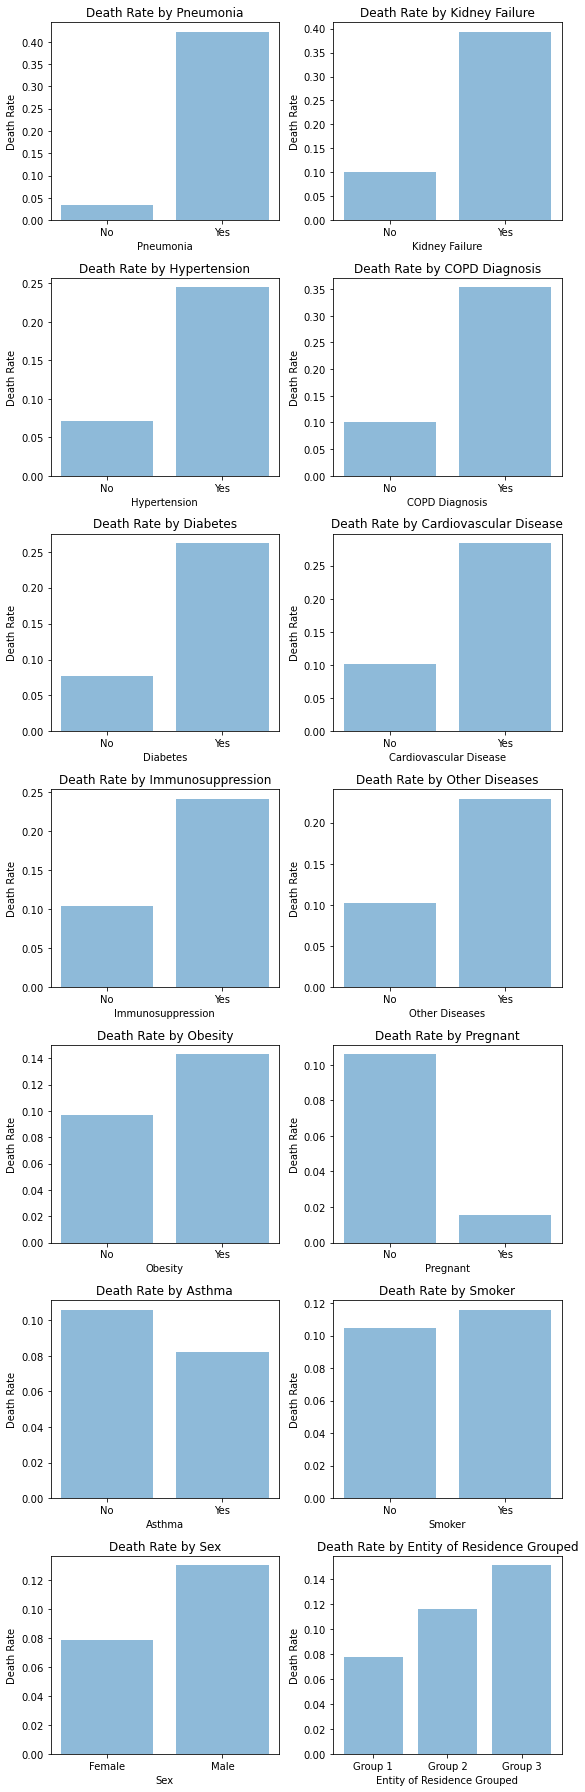

In [5]:
#plotting all the binary yes or no risk factors death rates in the same figure as well as Sex and Entity Location
fig,ax = plt.subplots(7,2)
fig.set_size_inches(8, 25)
ax[0,0] = getDeathRates3(covid_data,'Pneumonia','Died',ax[0,0],mappings['Pneumonia'])
ax[0,1] = getDeathRates3(covid_data,'Kidney Failure','Died',ax[0,1],mappings['Kidney Failure'])
ax[1,0] = getDeathRates3(covid_data,'Hypertension','Died',ax[1,0],mappings['Hypertension'])
ax[1,1] = getDeathRates3(covid_data,'COPD Diagnosis','Died',ax[1,1],mappings['COPD Diagnosis'])
ax[2,0] = getDeathRates3(covid_data,'Diabetes','Died',ax[2,0],mappings['Diabetes'])
ax[2,1] = getDeathRates3(covid_data,'Cardiovascular Disease','Died',ax[2,1],mappings['Cardiovascular Disease'])
ax[3,0] = getDeathRates3(covid_data,'Immunosuppression','Died',ax[3,0],mappings['Immunosuppression'])
ax[3,1] = getDeathRates3(covid_data,'Other Diseases','Died',ax[3,1],mappings['Other Diseases'])
ax[4,0] = getDeathRates3(covid_data,'Obesity','Died',ax[4,0],mappings['Obesity'])
ax[4,1] = getDeathRates3(covid_data,'Pregnant','Died',ax[4,1],mappings['Pregnant'])
ax[5,0] = getDeathRates3(covid_data,'Asthma','Died',ax[5,0],mappings['Asthma'])
ax[5,1] = getDeathRates3(covid_data,'Smoker','Died',ax[5,1],mappings['Smoker'])
ax[6,0] = getDeathRates3(covid_data,'Sex','Died',ax[6,0],mappings['Sex'])
ax[6,1] = getDeathRates3(covid_data,'Entity of Residence Grouped','Died',ax[6,1],mappings['Entity Location Grouped'])
fig.tight_layout()
fig.savefig('Binary Variable Death Rates.png')

### Also Figure 1 in Report

Text(0.5, 1.0, 'Death Rate by Age Group')

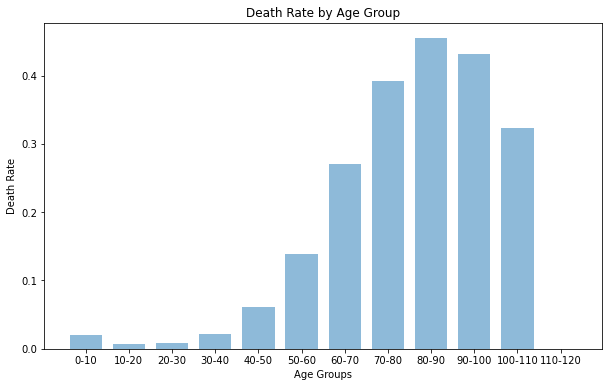

In [6]:
#plotting the death rates by age group (every 10 years)
gap = 10
death_rates = []
x_labs = []
x_labeling = []
for i in range(0,120,gap):
    subset = covid_data[covid_data['Age'].between(i,i+gap)]
    death_rates.append(sum(subset['Died'])/len(subset['Died']))
    x_labs.append((i+i+gap)/2)
    x_labeling.append(str(i)+"-"+str(i+gap))

fig,ax = plt.subplots(1)    
fig.set_size_inches(10, 6)
ax.bar(x_labs, death_rates, align='center', alpha=0.5,width=gap*3/4)
ax.set_xlabel('Age Groups')
ax.set_xticks(x_labs)
ax.set_xticklabels(x_labeling)
ax.set_ylabel('Death Rate')
ax.set_title('Death Rate by Age Group')
#fig.savefig('Age Rates.png')

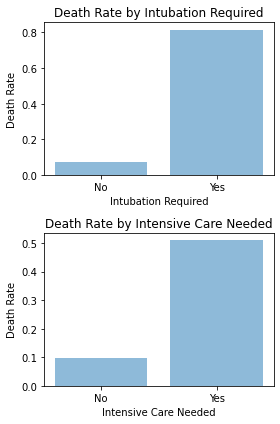

In [7]:
#plotting all binary yes/no variables that are not considered risk factors
fig,ax = plt.subplots(2)
fig.set_size_inches(4, 6)
ax[0] = getDeathRates3(covid_data,'Intubation Required','Died',ax[0],mappings['Intubation Required'])
ax[1] = getDeathRates3(covid_data,'Intensive Care Needed','Died',ax[1],mappings['Intensive Care Needed'])
fig.tight_layout()

The above plot shows that if you are given Intubation or sent to Intensive Care, then you have a much higher change of dying. This seems pretty obvious, because the fact you need more care means COVID is taking a larger toll on you. I think for this reason, as well as not knowing ahead of time whether you will be put into ICU or need Intubation, that these features should be left out of analysis.

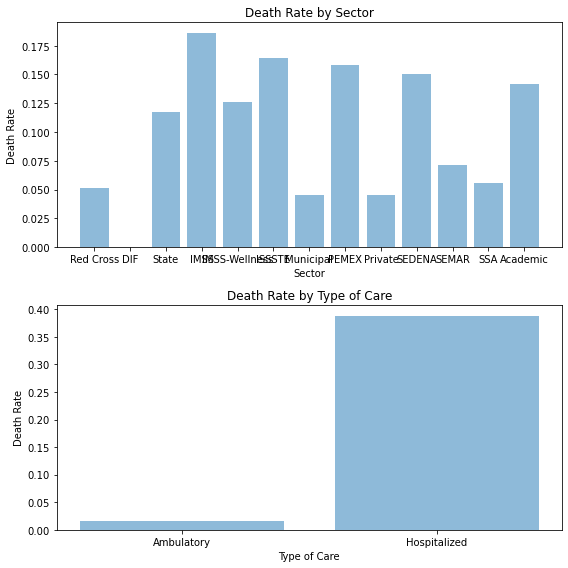

In [8]:
#plotting all the other non yes/no categorical variables but that I didn't find to be useful in analysis
fig,ax = plt.subplots(2)
fig.set_size_inches(8, 8)
ax[0] = getDeathRates3(covid_data,'Sector','Died',ax[0],mappings['Sector'])
ax[1] = getDeathRates3(covid_data,'Type of Care','Died',ax[1],mappings['Type of Care'])
fig.tight_layout()

The above plot shows that if you are hospitalized then you have a much larger chance of dying than if you are put in ambulatory care. This seems to make since. And again, similar to above with Intubation and ICU, you don't know ahead of time what your outcome for this feature will be. This also applies to the Sector feature, because you likely don't know ahead of time which sector you will be treated in. Therefore, these should be left out of the analysis too.

## Deleting the unneccesary rows that were only necessary for visualization

In [9]:
variables_to_delete = ['Type of Care','Care_1','Care_2','Sector','Sector_1','Sector_2','Sector_3','Sector_4','Sector_5','Sector_6',
                      'Sector_7','Sector_8','Sector_9','Sector_10','Sector_11','Sector_12','Sector_13','Intensive Care Needed',
                      'Intubation Required','Origin','Origin_1','Origin_2','Entity Location','Entity of Birth','Test Result',
                       'Entity Location Grouped','Entity of Residence Grouped','Entity_1','Entity_2','Entity_3','Entity of Birth Grouped',
                      'Birth_1','Birth_2','Birth_3','Entity of Residence','Sex']
for var in variables_to_delete:
    del covid_data[var]

In [10]:
covid_data.to_csv('Data/Post_Visualization_Data_10-12.csv')

### Entity of Residence Mappings

#### Group 1

In [11]:
entity_map = mappings['Entity of Residence Mapping']
entity_nums = list(entity_map.keys())
entity_groups = list(entity_map.values())

group1 = []
group2 = []
group3 = []
for g in entity_groups:
    if g == 1:
        group1.append(True)
        group2.append(False)
        group3.append(False)
    elif g == 2:
        group1.append(False)
        group2.append(True)
        group3.append(False)
    else:
        group1.append(False)
        group2.append(False)
        group3.append(True)
entity_map = raw_mappings['Entity of Residence']

In [12]:
print("Entities in Group 1 are:\n")
g1 = pd.Series(entity_nums)[group1]
for item in g1:
    print(entity_map[item])

Entities in Group 1 are:

BAJA CALIFORNIA SUR
DURANGO
COAHUILA DE ZARAGOZA
GUANAJUATO
SAN LUIS POTOSÍ
NUEVO LEÓN
TAMAULIPAS
MICHOACÁN DE OCAMPO
CIUDAD DE MÉXICO
OAXACA
AGUASCALIENTES
TABASCO
YUCATÁN


#### Group 2

In [13]:
print("Entities in Group 2 are:\n")
g2 = pd.Series(entity_nums)[group2]
for item in g2:
    print(entity_map[item])

Entities in Group 2 are:

ZACATECAS
GUERRERO
QUERÉTARO
COLIMA
JALISCO
SONORA
PUEBLA
CHIHUAHUA
NAYARIT


#### Group 3

In [14]:
print("Entities in Group 3 are:\n")
g3 = pd.Series(entity_nums)[group3]
for item in g3:
    print(entity_map[item])

Entities in Group 3 are:

VERACRUZ DE IGNACIO DE LA LLAVE
CAMPECHE
QUINTANA ROO
TLAXCALA
HIDALGO
MÉXICO
CHIAPAS
SINALOA
BAJA CALIFORNIA
MORELOS
